In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dongsi = pd.read_csv('/content/PRSA_Data_Dongsi_20130301-20170228.csv')
shunyi = pd.read_csv('/content/PRSA_Data_Shunyi_20130301-20170228.csv')
huairou = pd.read_csv('/content/PRSA_Data_Huairou_20130301-20170228.csv')
gucheng = pd.read_csv('/content/PRSA_Data_Gucheng_20130301-20170228.csv')

dongsi['site_type'] = 'urban'
dongsi['site_name'] = 'Dongsi'

shunyi['site_type'] = 'suburban'
shunyi['site_name'] = 'Shunyi'

huairou['site_type'] = 'rural'
huairou['site_name'] = 'Huairou'

gucheng['site_type'] = 'industrial'
gucheng['site_name'] = 'Gucheng'

merged_data = pd.concat([dongsi, shunyi, huairou, gucheng], ignore_index=True)

if not os.path.exists('data'):
    os.makedirs('data')

merged_data.to_csv('data/merged_data.csv', index=False)

print(f"Total records: {merged_data.shape[0]}")
print(f"Total features: {merged_data.shape[1]}")
merged_data.head()

Total records: 140256
Total features: 20


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,site_type,site_name
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi,urban,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi,urban,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi,urban,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi,urban,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi,urban,Dongsi


In [ ]:
df = pd.read_csv('/content/data/merged_data.csv')

In [ ]:
df.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,site_type,site_name
140251,35060,2017,2,28,19,14.0,58.0,4.0,19.0,500.0,56.0,12.8,1009.9,-17.0,0.0,NNW,3.1,Gucheng,industrial,Gucheng
140252,35061,2017,2,28,20,27.0,83.0,6.0,60.0,700.0,26.0,11.1,1010.4,-15.5,0.0,NW,1.9,Gucheng,industrial,Gucheng
140253,35062,2017,2,28,21,22.0,37.0,7.0,52.0,600.0,27.0,10.5,1010.8,-15.9,0.0,N,2.3,Gucheng,industrial,Gucheng
140254,35063,2017,2,28,22,9.0,23.0,3.0,13.0,400.0,57.0,8.9,1010.9,-14.9,0.0,NE,1.6,Gucheng,industrial,Gucheng
140255,35064,2017,2,28,23,12.0,48.0,5.0,48.0,600.0,28.0,6.2,1010.5,-13.4,0.0,NNE,0.7,Gucheng,industrial,Gucheng


In [ ]:
df.shape

(140256, 20)

In [ ]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station',
       'site_type', 'site_name'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140256 entries, 0 to 140255
Data columns (total 20 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   No         140256 non-null  int64  
 1   year       140256 non-null  int64  
 2   month      140256 non-null  int64  
 3   day        140256 non-null  int64  
 4   hour       140256 non-null  int64  
 5   PM2.5      136994 non-null  float64
 6   PM10       137997 non-null  float64
 7   SO2        136810 non-null  float64
 8   NO2        134983 non-null  float64
 9   CO         132058 non-null  float64
 10  O3         136223 non-null  float64
 11  TEMP       140083 non-null  float64
 12  PRES       140082 non-null  float64
 13  DEWP       140078 non-null  float64
 14  RAIN       140087 non-null  float64
 15  wd         139234 non-null  object 
 16  WSPM       140107 non-null  float64
 17  station    140256 non-null  object 
 18  site_type  140256 non-null  object 
 19  site_name  140256 non-n

In [ ]:
df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,3262
PM10,2259
SO2,3446
NO2,5273
CO,8198


In [ ]:
df.fillna(df.mean(numeric_only=True), inplace=True)

df['wd'] = df['wd'].fillna(df['wd'].mode()[0])

print(df.isnull().sum())

df.to_csv("cleaned_air_quality.csv", index=False)


No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd           0
WSPM         0
station      0
site_type    0
site_name    0
dtype: int64


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
140251,False
140252,False
140253,False
140254,False


In [ ]:
df.sample(20)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,site_type,site_name
1555,1556,2013,5,4,19,69.0,114.0,17.0,28.000000,600.0,152.000000,21.8,1011.3,3.4,0.0,WSW,1.7,Dongsi,urban,Dongsi
44087,9024,2014,3,11,23,12.0,15.0,4.0,5.000000,200.0,83.000000,8.0,1020.9,-8.1,0.0,NNE,5.2,Shunyi,suburban,Shunyi
118973,13782,2014,9,26,5,92.0,92.0,3.0,52.000000,900.0,57.488232,17.2,1003.8,15.7,0.0,W,1.0,Gucheng,industrial,Gucheng
87954,17827,2015,3,13,18,9.0,24.0,2.0,11.000000,300.0,94.000000,10.9,1011.8,-20.8,0.0,SSW,1.1,Huairou,rural,Huairou
25804,25805,2016,2,9,4,11.0,21.0,11.0,43.000000,600.0,32.000000,-1.6,1017.4,-10.9,0.0,SW,0.1,Dongsi,urban,Dongsi
35874,811,2013,4,3,18,64.0,124.0,12.0,27.000000,900.0,116.000000,12.8,1010.5,-3.1,0.0,S,2.2,Shunyi,suburban,Shunyi
48857,13794,2014,9,26,17,165.0,165.0,4.0,45.000000,2200.0,39.000000,18.9,1006.5,16.7,0.0,NNW,1.7,Shunyi,suburban,Shunyi
73102,2975,2013,7,2,22,3.0,33.0,3.0,11.000000,400.0,52.000000,24.5,986.9,20.8,0.0,W,1.0,Huairou,rural,Huairou
24310,24311,2015,12,8,22,264.0,264.0,36.0,87.000000,4300.0,4.000000,1.0,1024.5,0.4,0.0,NE,0.9,Dongsi,urban,Dongsi
118560,13369,2014,9,9,0,20.0,46.0,2.0,54.000000,600.0,45.000000,17.4,1001.8,10.7,0.0,N,0.1,Gucheng,industrial,Gucheng


In [ ]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,140256.000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000
mean,17532.500,2014.662560,6.522930,15.729637,11.500000,79.809590,104.893552,14.910815,46.558392,1214.563525,57.488232,13.342425,1010.509860,2.440412,0.064376,1.665950
std,10122.141,1.177201,3.448715,8.800123,6.922211,79.972073,91.914202,20.592560,32.888985,1093.354533,55.373779,11.503334,10.403205,13.835464,0.809224,1.246633
min,1.000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750,2014.000000,4.000000,8.000000,5.750000,21.000000,35.000000,2.000000,21.000000,500.000000,13.000000,3.000000,1002.200000,-9.000000,0.000000,0.900000
50%,17532.500,2015.000000,7.000000,16.000000,11.500000,57.000000,84.000000,7.000000,41.000000,900.000000,48.000000,14.300000,1010.200000,2.900000,0.000000,1.300000
75%,26298.250,2016.000000,10.000000,23.000000,17.250000,109.000000,146.000000,18.000000,65.000000,1500.000000,80.000000,23.100000,1018.600000,15.200000,0.000000,2.100000
max,35064.000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,500.000000,276.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,46.400000,12.900000


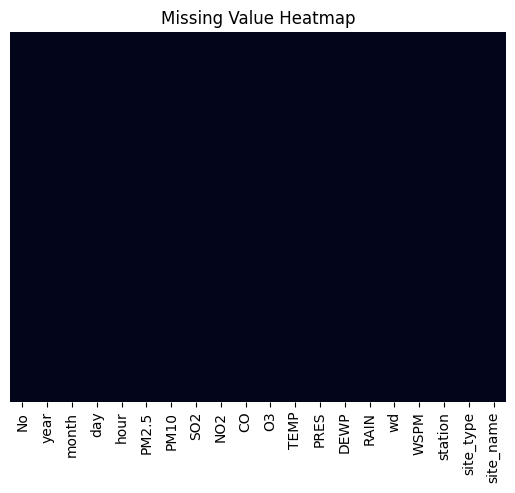

In [ ]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Value Heatmap")
plt.show()

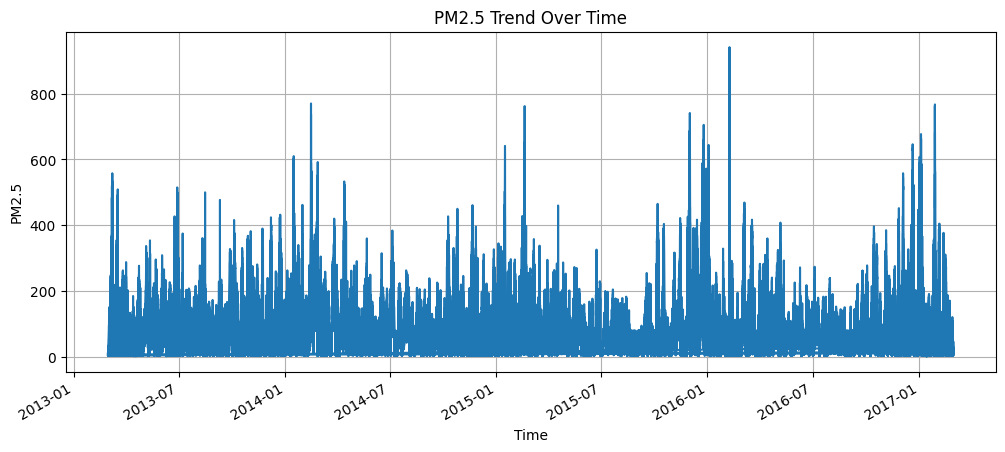

In [ ]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

df.set_index('datetime', inplace=True)

df['PM2.5'].plot(figsize=(12, 5), title="PM2.5 Trend Over Time")
plt.ylabel("PM2.5")
plt.xlabel("Time")
plt.grid()
plt.show()


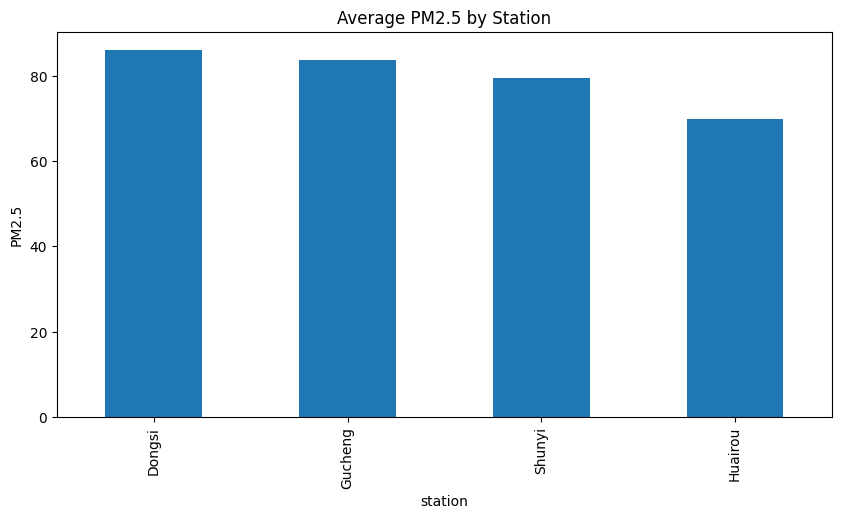

In [ ]:
station_avg = df.groupby('station')['PM2.5'].mean().sort_values(ascending=False)

station_avg.plot(kind='bar', figsize=(10, 5), title='Average PM2.5 by Station')
plt.ylabel('PM2.5')
plt.show()


<ipython-input-15-85a0a9bbe81c>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = site_data.groupby(pd.Grouper(level='datetime', freq='M'))['PM2.5'].mean()
<ipython-input-15-85a0a9bbe81c>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = site_data.groupby(pd.Grouper(level='datetime', freq='M'))['PM2.5'].mean()
<ipython-input-15-85a0a9bbe81c>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = site_data.groupby(pd.Grouper(level='datetime', freq='M'))['PM2.5'].mean()
<ipython-input-15-85a0a9bbe81c>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = site_data.groupby(pd.Grouper(level='datetime', freq='M'))['PM2.5'].mean()


Text(0.5, 1.0, 'Monthly Average PM2.5 by Site Type')

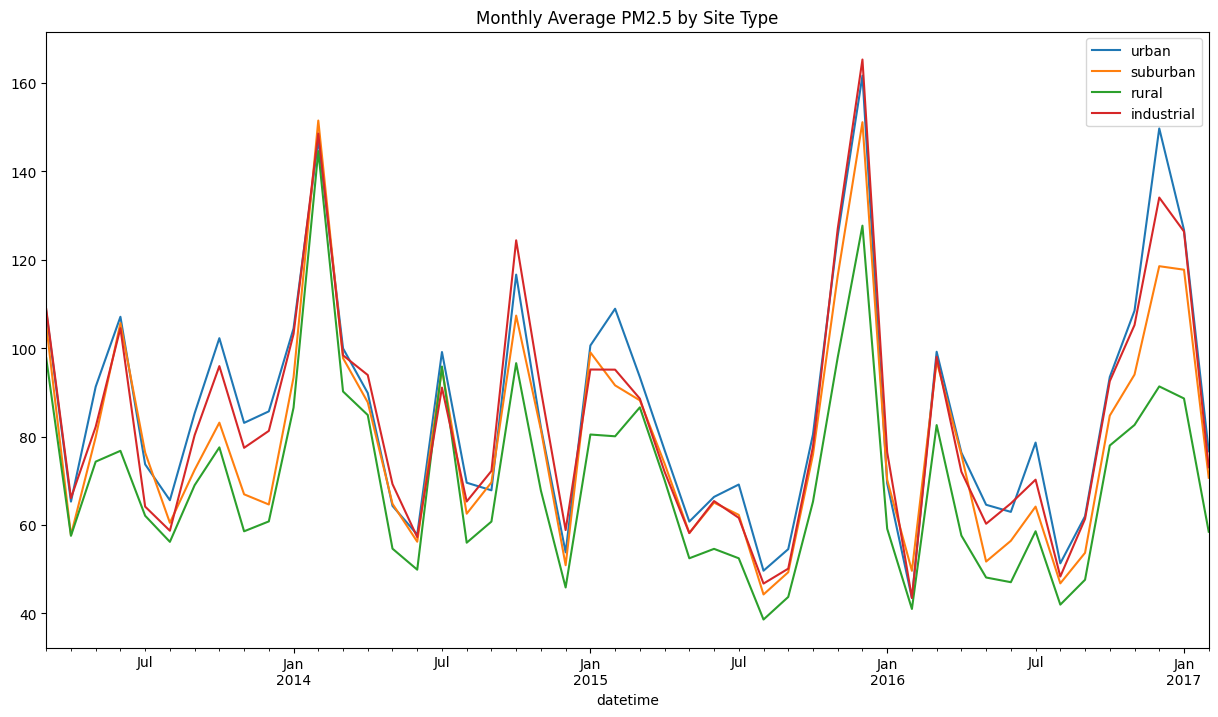

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
for site_type in df['site_type'].unique():
    site_data = df[df['site_type'] == site_type]
    monthly_avg = site_data.groupby(pd.Grouper(level='datetime', freq='M'))['PM2.5'].mean()
    monthly_avg.plot(ax=ax, label=site_type)

plt.legend()
plt.title('Monthly Average PM2.5 by Site Type')

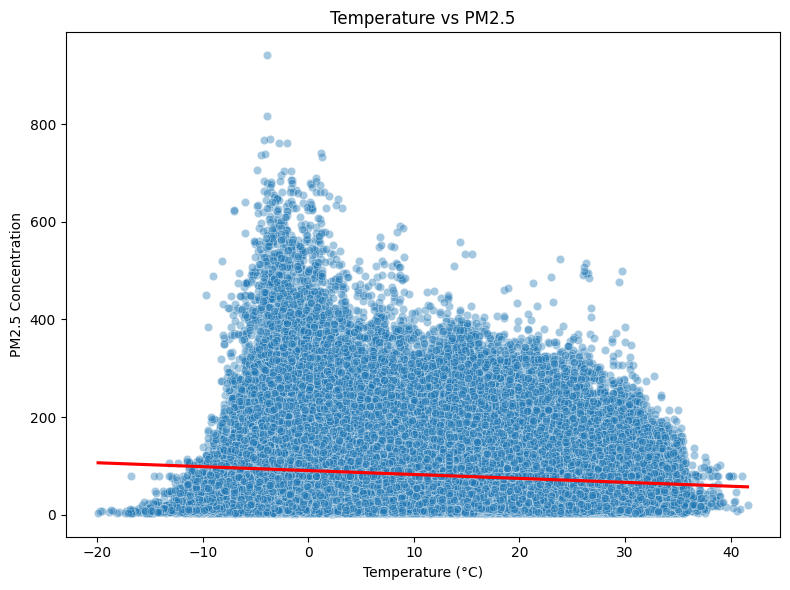

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TEMP', y='PM2.5', data=df, alpha=0.4)
sns.regplot(x='TEMP', y='PM2.5', data=df, scatter=False, color='red')
plt.title('Temperature vs PM2.5')
plt.xlabel('Temperature (°C)')
plt.ylabel('PM2.5 Concentration')
plt.tight_layout()
plt.show()

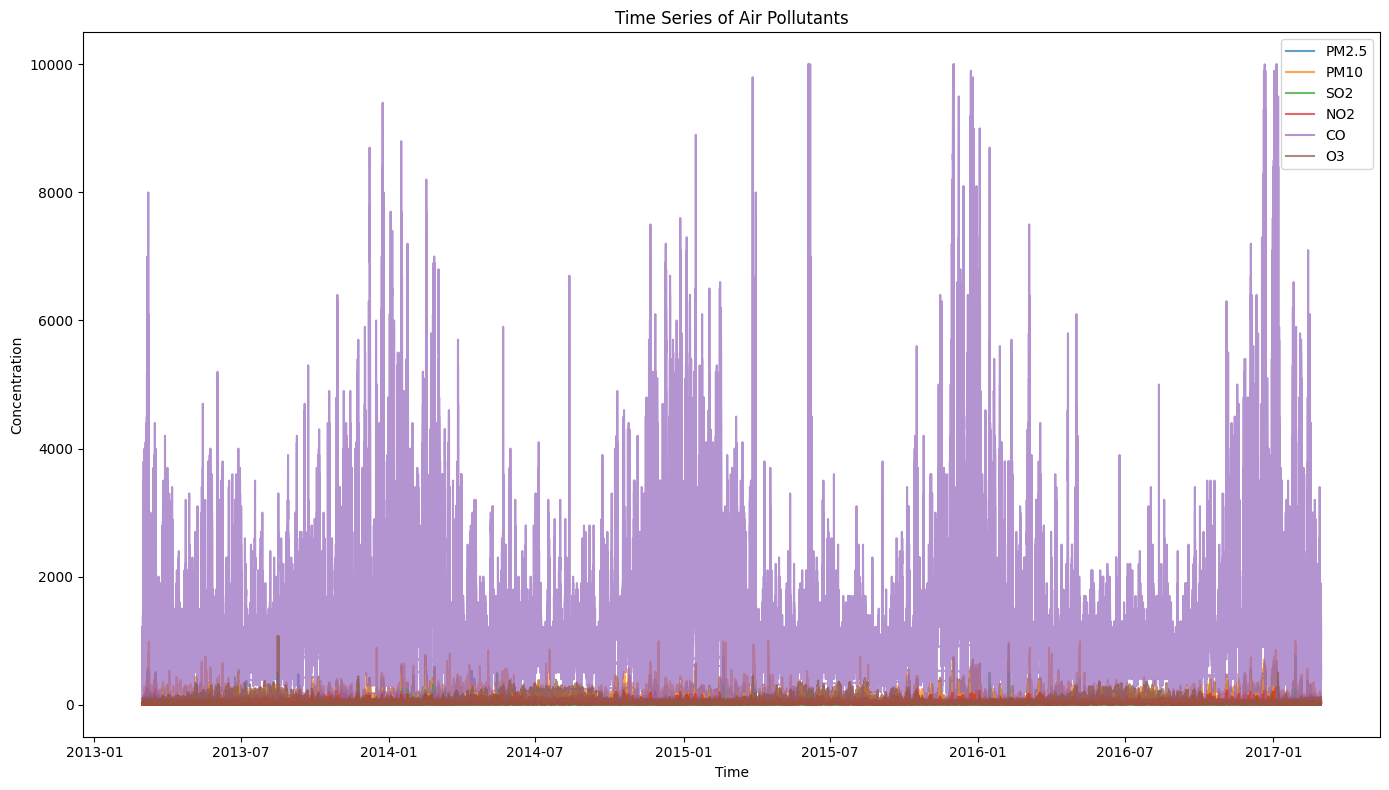

In [ ]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

plt.figure(figsize=(14, 8))
for pollutant in pollutants:
    plt.plot(df[pollutant], label=pollutant, alpha=0.7)
plt.legend()
plt.title('Time Series of Air Pollutants')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.tight_layout()
plt.show()

<ipython-input-18-6401a9788aaa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wind_pm.index, y=wind_pm.values, palette='viridis')


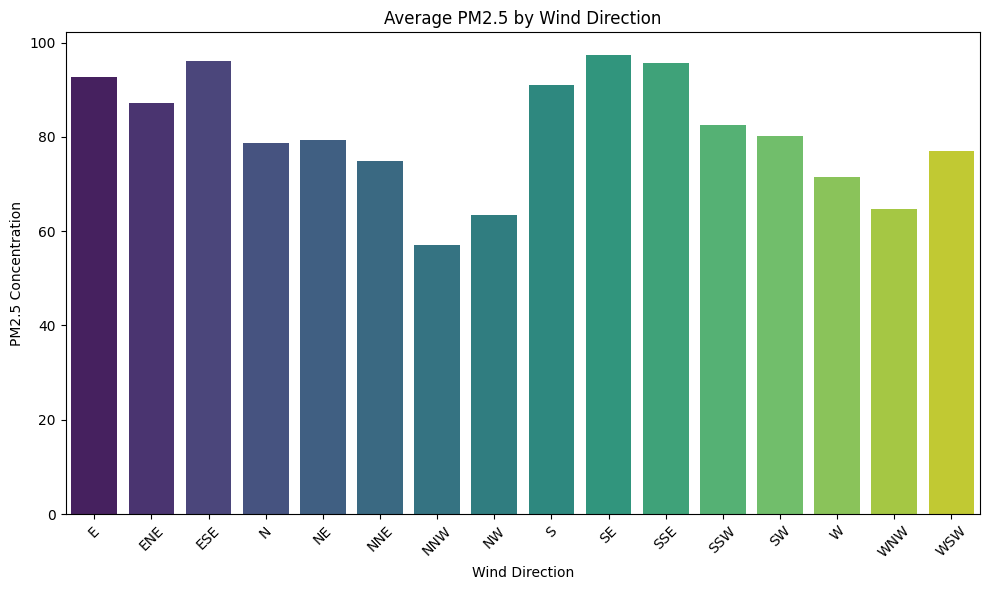

In [ ]:
wind_pm = df.groupby('wd')['PM2.5'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=wind_pm.index, y=wind_pm.values, palette='viridis')
plt.title('Average PM2.5 by Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('PM2.5 Concentration')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

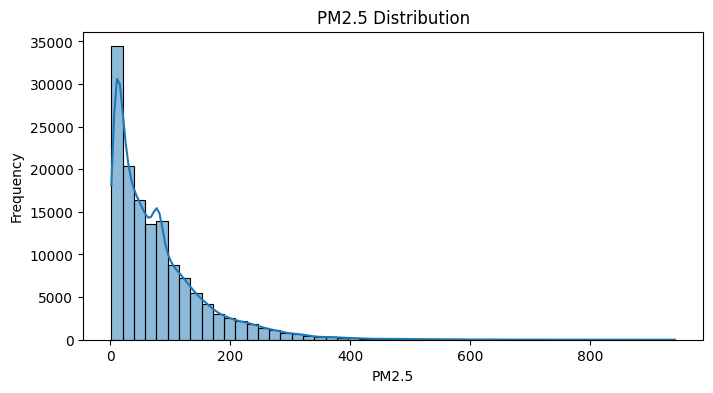

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['PM2.5'], bins=50, kde=True)
plt.title("PM2.5 Distribution")
plt.xlabel("PM2.5")
plt.ylabel("Frequency")
plt.show()

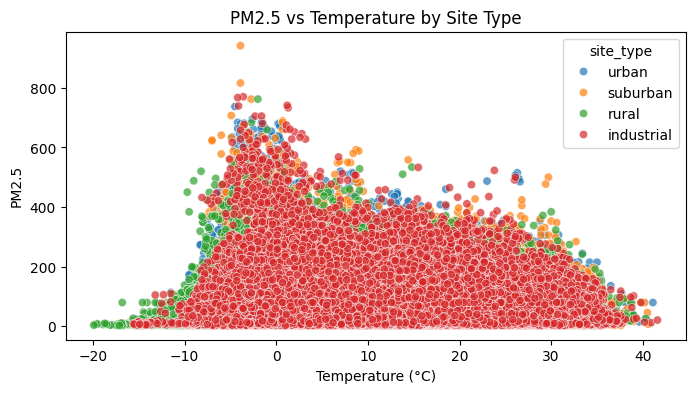

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='TEMP', y='PM2.5', data=df, hue='site_type', alpha=0.7)
plt.title("PM2.5 vs Temperature by Site Type")
plt.xlabel("Temperature (°C)")
plt.ylabel("PM2.5")
plt.show()




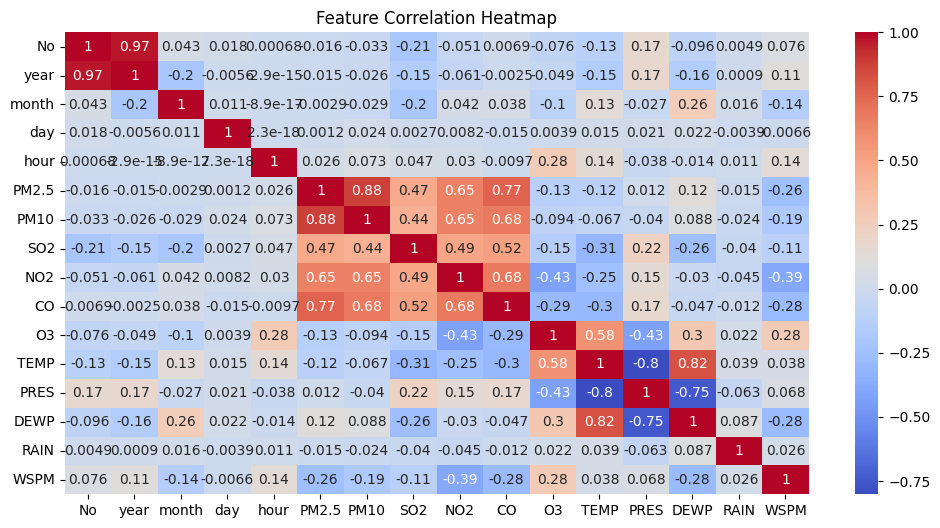

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


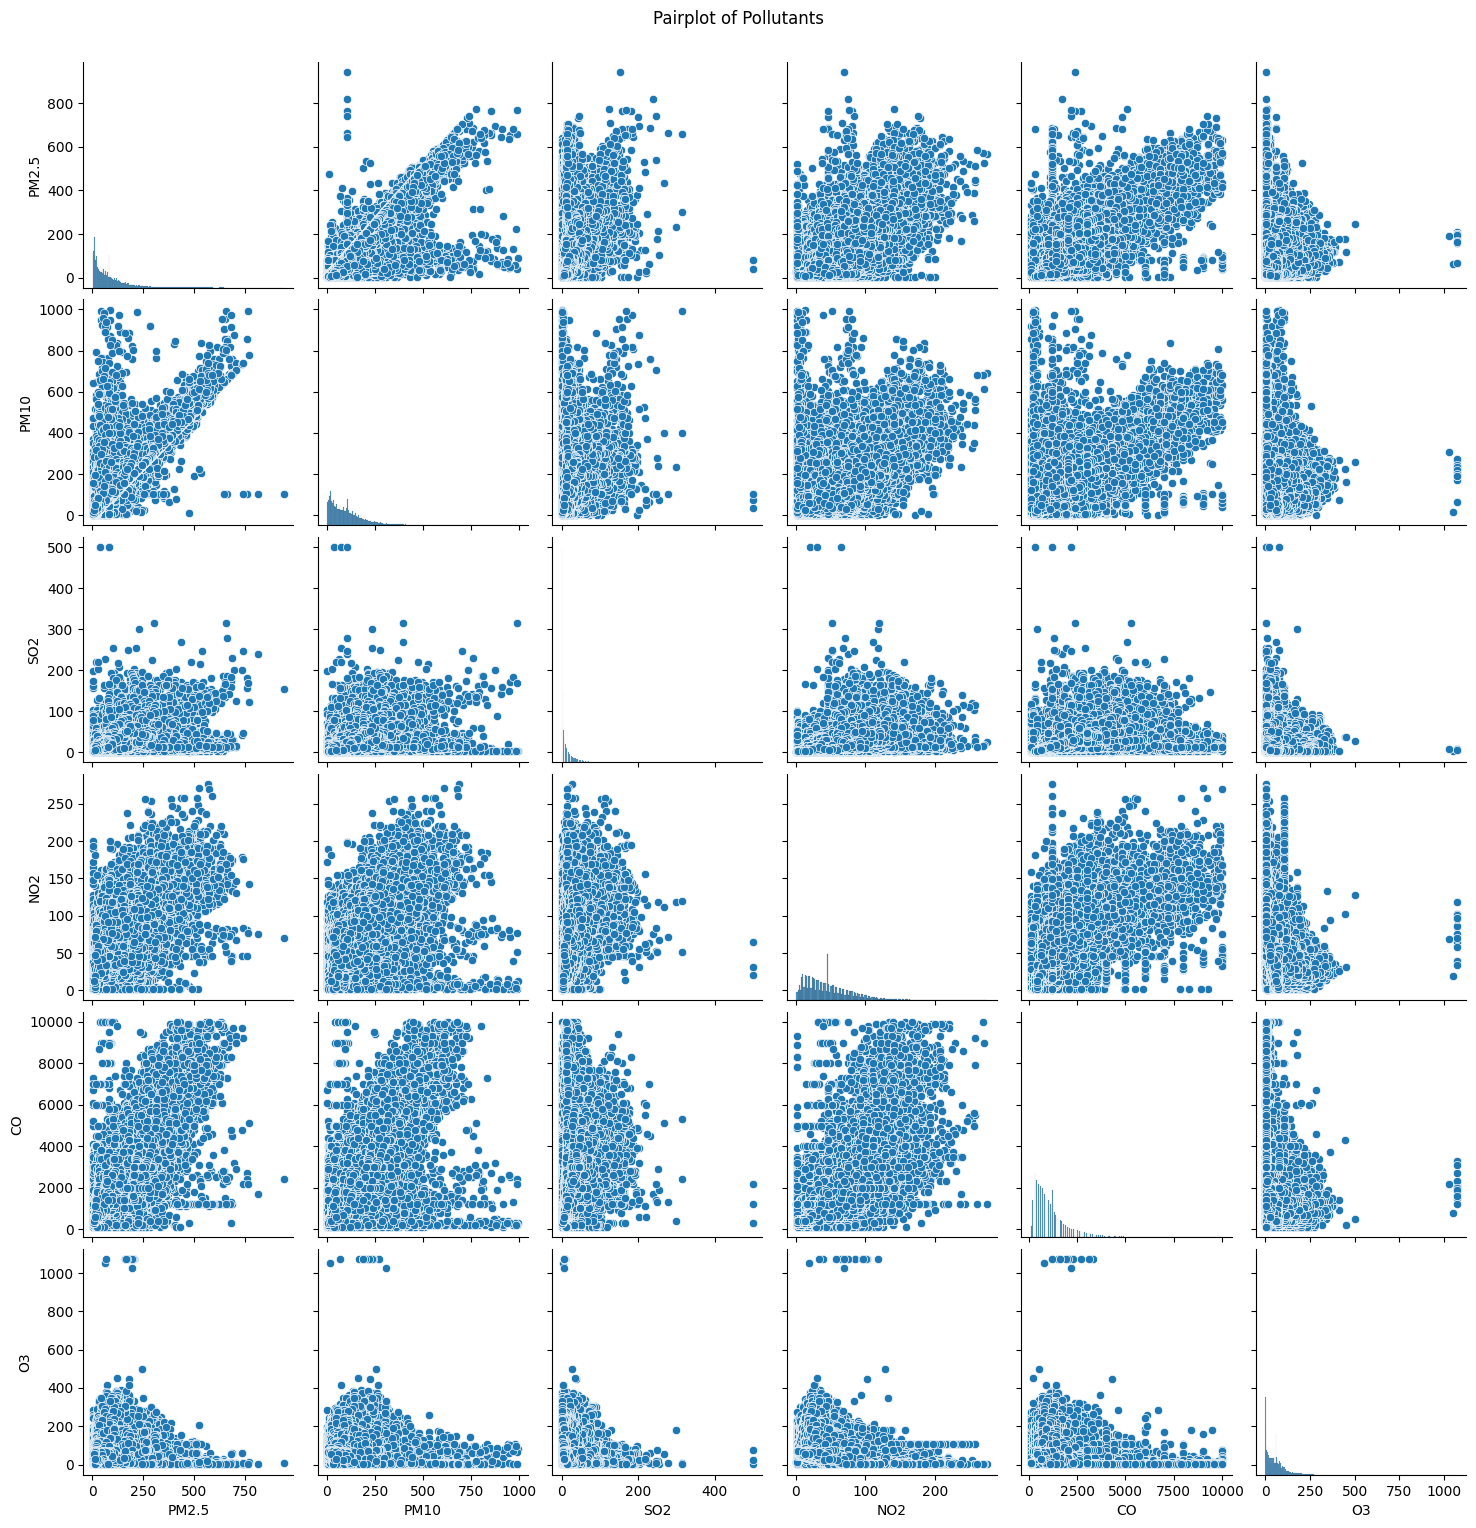

In [ ]:
sns.pairplot(df[pollutants].dropna())
plt.suptitle('Pairplot of Pollutants', y=1.02)
plt.show()


In [ ]:
pollutant_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

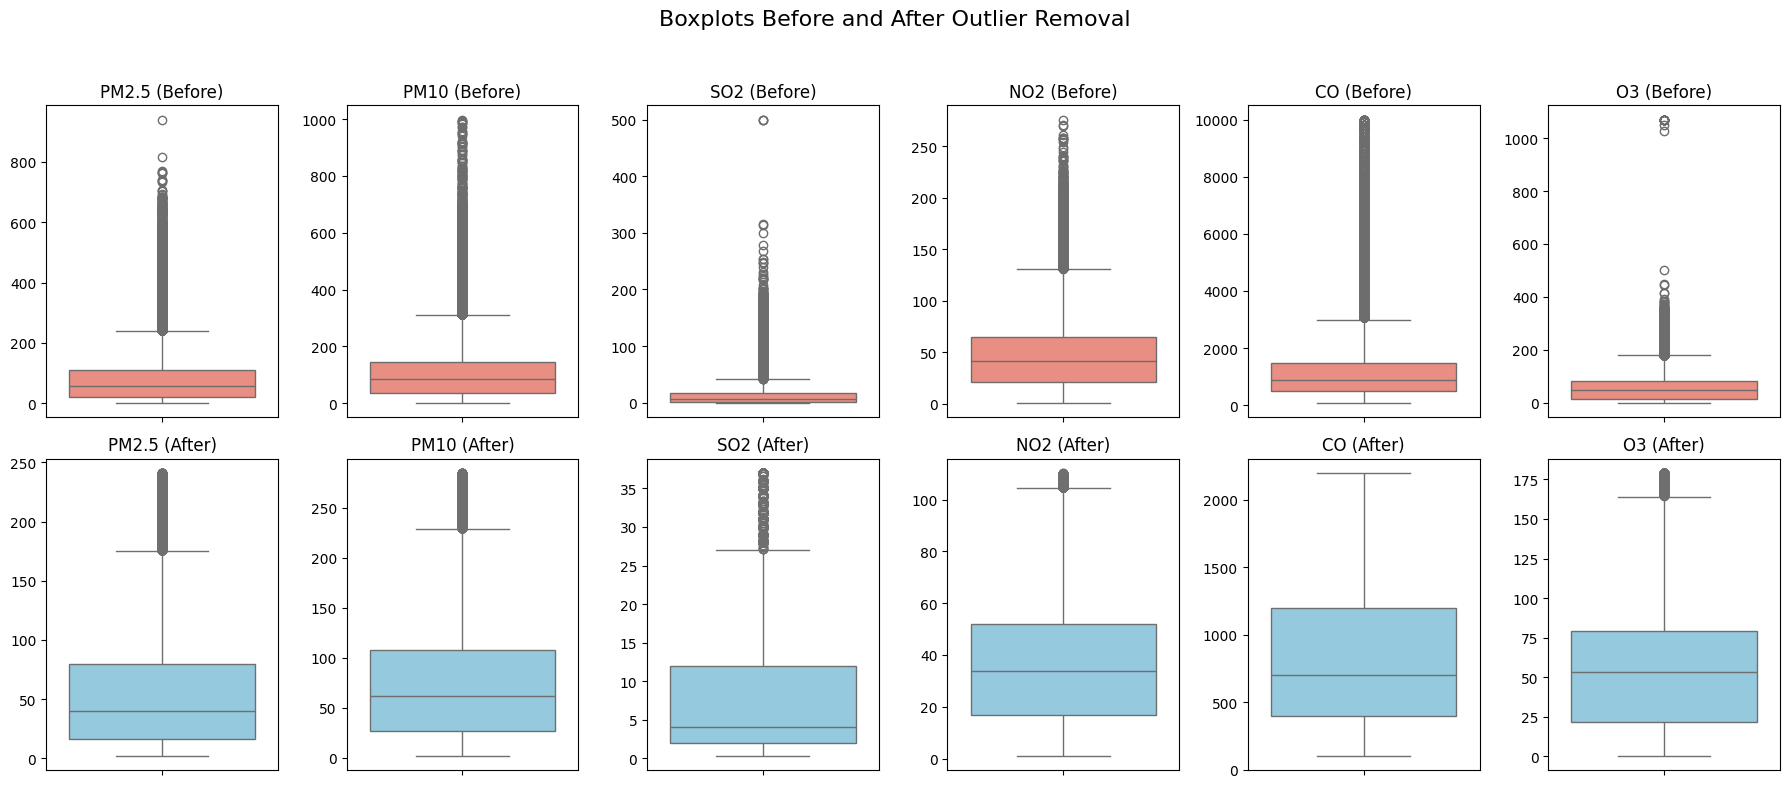

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

pollutant_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

df_cleaned = remove_outliers_iqr(df.copy(), pollutant_columns)
fig, axes = plt.subplots(2, len(pollutant_columns), figsize=(18, 8))
fig.suptitle('Boxplots Before and After Outlier Removal', fontsize=16)

for i, col in enumerate(pollutant_columns):
    sns.boxplot(y=df[col], ax=axes[0, i], color="salmon")
    axes[0, i].set_title(f"{col} (Before)")
    axes[0, i].set_xlabel("")
    axes[0, i].set_ylabel("")

for i, col in enumerate(pollutant_columns):
    sns.boxplot(y=df_cleaned[col], ax=axes[1, i], color="skyblue")
    axes[1, i].set_title(f"{col} (After)")
    axes[1, i].set_xlabel("")
    axes[1, i].set_ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

FEATURE ENGINEERING /FEATURE SCALING

In [ ]:
numerical_cols = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
                  'WSPM', 'temp_dew_point_diff', 'hour', 'day', 'month', 'day_of_week']
categorical_cols = ['wd', 'station', 'site_type', 'is_weekend', 'is_peak_hour']

print("🔢 Numerical Features:")
print(numerical_cols)

print("\n🔤 Categorical Features:")
print(categorical_cols)


🔢 Numerical Features:
['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM', 'temp_dew_point_diff', 'hour', 'day', 'month', 'day_of_week']

🔤 Categorical Features:
['wd', 'station', 'site_type', 'is_weekend', 'is_peak_hour']


In [ ]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)


In [ ]:
df.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)

print("✅ Remaining columns after dropping year, month, day, and hour:")
print(df.columns)

✅ Remaining columns after dropping year, month, day, and hour:
Index(['No', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'wd', 'WSPM', 'station', 'site_type', 'site_name'],
      dtype='object')


In [ ]:
df.sample(10)

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,site_type,site_name
datetime,,,,,,,,,,,,,,,,
2016-07-30 21:00:00,29950,43.00000,43.000000,2.000000,40.000000,900.000000,74.000000,25.6,1001.6,22.5,0.0,NNE,1.5,Gucheng,industrial,Gucheng
2015-06-12 18:00:00,20011,9.00000,27.000000,2.000000,29.000000,500.000000,62.000000,25.4,993.4,11.6,0.0,W,3.5,Shunyi,suburban,Shunyi
2015-01-22 04:00:00,16613,37.00000,37.000000,2.000000,29.000000,1300.000000,17.000000,-8.0,1017.0,-16.1,0.0,NW,1.6,Huairou,rural,Huairou
2016-04-17 18:00:00,27451,9.00000,14.000000,2.000000,19.000000,200.000000,80.000000,17.6,1005.6,-9.4,0.0,NNW,1.6,Shunyi,suburban,Shunyi
2014-02-17 23:00:00,8496,94.00000,148.000000,92.000000,79.000000,1700.000000,14.000000,-2.8,1027.3,-12.3,0.0,SE,0.6,Huairou,rural,Huairou
2013-09-01 03:00:00,4420,11.00000,20.000000,2.000000,12.000000,500.000000,32.000000,16.0,1004.6,15.5,0.0,ESE,0.5,Huairou,rural,Huairou
2013-05-10 11:00:00,1692,79.80959,104.893552,14.910815,46.558392,1214.563525,57.488232,26.8,992.6,-1.1,0.0,N,4.7,Huairou,rural,Huairou
2016-08-19 10:00:00,30419,12.00000,12.000000,2.000000,26.000000,800.000000,69.000000,29.1,1002.2,19.1,0.0,NE,3.2,Dongsi,urban,Dongsi
2013-07-16 08:00:00,3297,79.80959,28.000000,3.998400,15.808100,1214.563525,22.705200,27.4,996.0,17.3,0.0,NNW,2.9,Shunyi,suburban,Shunyi


In [ ]:
def categorize_pm25(value):
    if value <= 12:
        return 'Good'
    elif value <= 35.4:
        return 'Moderate'
    elif value <= 55.4:
        return 'Unhealthy for Sensitive Groups'
    elif value <= 150.4:
        return 'Unhealthy'
    elif value <= 250.4:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

df['PM2.5_Category'] = df['PM2.5'].apply(categorize_pm25)


In [ ]:
df = pd.get_dummies(df, columns=['wd', 'station'], prefix=['wind', 'station'], drop_first=True)

print("\nEncoded categorical variables:")
print(df.filter(regex='^wind_|^station_').head())



Encoded categorical variables:
                     wind_ENE  wind_ESE  wind_N  wind_NE  wind_NNE  wind_NNW  \
datetime                                                                       
2013-03-01 00:00:00     False     False   False    False     False      True   
2013-03-01 01:00:00     False     False   False    False     False     False   
2013-03-01 02:00:00     False     False   False    False     False      True   
2013-03-01 03:00:00     False     False    True    False     False     False   
2013-03-01 04:00:00     False     False   False    False     False      True   

                     wind_NW  wind_S  wind_SE  wind_SSE  wind_SSW  wind_SW  \
datetime                                                                     
2013-03-01 00:00:00    False   False    False     False     False    False   
2013-03-01 01:00:00     True   False    False     False     False    False   
2013-03-01 02:00:00    False   False    False     False     False    False   
2013-03-01 03:00:

In [ ]:
df['PM_ratio'] = df['PM2.5'] / df['PM10']
df['PM_ratio'] = df['PM_ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)

df['NO2_O3_ratio'] = df['NO2'] / df['O3']
df['NO2_O3_ratio'] = df['NO2_O3_ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)

df['total_pollution'] = df['PM2.5'] + df['PM10'] + df['SO2'] + df['NO2'] + df['CO'] + df['O3']


In [ ]:
def calculate_pm25_aqi(pm25):
    if pm25 <= 12:
        return pm25 * 50/12
    elif pm25 <= 35.4:
        return 50 + (pm25-12) * 50/(35.4-12)
    elif pm25 <= 55.4:
        return 100 + (pm25-35.4) * 50/(55.4-35.4)
    elif pm25 <= 150.4:
        return 150 + (pm25-55.4) * 50/(150.4-55.4)
    elif pm25 <= 250.4:
        return 200 + (pm25-150.4) * 100/(250.4-150.4)
    else:
        return 300 + (pm25-250.4) * 200/(500-250.4)

df['PM25_AQI'] = df['PM2.5'].apply(calculate_pm25_aqi)

print(f"Final DataFrame shape: {df.shape}")

Final DataFrame shape: (140256, 37)


In [ ]:
station_mapping = {
    'Dongsi': 'Dongsi',
    'Shunyi': 'Shunyi',
    'Huairou': 'Huairou',
    'Gucheng': 'Gucheng'
}

if 'station' not in df.columns and 'station_code' in df.columns:
    station_names = list(station_mapping.values())

    station_codes = le.transform(station_names)
    station_mapping = dict(zip(station_codes, station_names))

    df['station'] = df['station_code'].map(station_mapping)
else:

    if 'site_name' in df.columns:
        df['station'] = df['site_name'].map(station_mapping)
    else:
        for station_name in station_mapping.keys():
            column_name = f'station_{station_name}'
            if column_name in df.columns:
                df.loc[df[column_name] == 1, 'station'] = station_name

if 'station_code' not in df.columns:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df['station_code'] = le.fit_transform(df['station'])

if df['site_type'].dtype == 'object':
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    df['site_type'] = label_encoder.fit_transform(df['site_type'])

if df['PM2.5_Category'].dtype == 'object':
    df['PM2.5_Category'] = label_encoder.fit_transform(df['PM2.5_Category'])

In [ ]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

from sklearn.preprocessing import LabelEncoder

label_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

print("\nAll numeric columns:")
print(df.dtypes)



All numeric columns:
No                   int64
PM2.5              float64
PM10               float64
SO2                float64
NO2                float64
CO                 float64
O3                 float64
TEMP               float64
PRES               float64
DEWP               float64
RAIN               float64
WSPM               float64
site_type            int64
site_name            int64
PM2.5_Category       int64
wind_ENE             int64
wind_ESE             int64
wind_N               int64
wind_NE              int64
wind_NNE             int64
wind_NNW             int64
wind_NW              int64
wind_S               int64
wind_SE              int64
wind_SSE             int64
wind_SSW             int64
wind_SW              int64
wind_W               int64
wind_WNW             int64
wind_WSW             int64
station_Gucheng      int64
station_Huairou      int64
station_Shunyi       int64
PM_ratio           float64
NO2_O3_ratio       float64
total_pollution    float64
PM25_A

In [ ]:
columns_to_drop = [
     'station_Gucheng', 'station_Huairou', 'station_Shunyi','station'
]

existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

df.drop(columns=existing_columns_to_drop, inplace=True)

print("✅ Columns dropped successfully:")
print(existing_columns_to_drop)

print("\n✅ Remaining columns in the DataFrame:")
print(df.columns)

✅ Columns dropped successfully:
['station_Gucheng', 'station_Huairou', 'station_Shunyi', 'station']

✅ Remaining columns in the DataFrame:
Index(['No', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'WSPM', 'site_type', 'site_name', 'PM2.5_Category', 'wind_ENE',
       'wind_ESE', 'wind_N', 'wind_NE', 'wind_NNE', 'wind_NNW', 'wind_NW',
       'wind_S', 'wind_SE', 'wind_SSE', 'wind_SSW', 'wind_SW', 'wind_W',
       'wind_WNW', 'wind_WSW', 'PM_ratio', 'NO2_O3_ratio', 'total_pollution',
       'PM25_AQI', 'station_code'],
      dtype='object')


In [ ]:
df.sample(10)

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,...,wind_SSW,wind_SW,wind_W,wind_WNW,wind_WSW,PM_ratio,NO2_O3_ratio,total_pollution,PM25_AQI,station_code
datetime,,,,,,,,,,,,,,,,,,,,,
2013-07-30 08:00:00,3633,131.0,114.0,14.910815,43.5236,1214.563525,19.0638,27.8,995.6,23.6,...,0,0,0,0,0,1.149123,2.283050,1537.061741,189.789474,3
2016-10-05 19:00:00,31556,86.0,101.0,3.000000,56.0000,1300.000000,2.0000,15.4,1010.3,13.9,...,0,0,0,0,0,0.851485,28.000000,1548.000000,166.105263,2
2014-04-16 09:00:00,9874,78.0,121.0,15.000000,89.0000,700.000000,10.0000,17.6,1008.1,-3.2,...,0,0,1,0,0,0.644628,8.900000,1013.000000,161.894737,1
2016-05-31 21:00:00,28510,38.0,38.0,10.000000,31.0000,1100.000000,56.0000,21.4,1002.3,9.9,...,0,0,0,0,1,1.000000,0.553571,1273.000000,106.500000,2
2014-12-22 04:00:00,15869,89.0,158.0,57.000000,74.0000,2700.000000,4.0000,-3.0,1013.0,-16.7,...,0,0,1,0,0,0.563291,18.500000,3082.000000,167.684211,1
2015-07-25 18:00:00,21043,81.0,93.0,2.000000,21.0000,900.000000,261.0000,31.4,990.3,22.1,...,0,0,0,0,0,0.870968,0.080460,1358.000000,163.473684,2
2014-11-15 17:00:00,14994,91.0,151.0,37.000000,112.0000,2100.000000,6.0000,7.7,1017.0,-7.6,...,0,0,0,0,0,0.602649,18.666667,2497.000000,168.736842,1
2014-07-02 07:00:00,11720,45.0,45.0,2.000000,21.0000,800.000000,107.0000,21.9,996.2,21.9,...,0,0,0,0,0,1.000000,0.196262,1020.000000,124.000000,1
2015-07-29 00:00:00,21121,113.0,118.0,2.000000,49.0000,1100.000000,62.0000,26.7,999.0,23.8,...,0,0,0,0,0,0.957627,0.790323,1444.000000,180.315789,0


In [ ]:
df.shape

(140256, 35)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
target = 'PM2.5'
features = df.drop(columns=[target])
X = df.drop(columns=['PM2.5'])
y = df[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("\n📊 Evaluation Metrics (Random Forest):")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))





📊 Evaluation Metrics (Random Forest):
RMSE: 0.3208101131348206
MAE: 0.006110509054617485
R² Score: 0.999984011559257


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("\n📊 Evaluation Metrics (Linear Regression):")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))



📊 Evaluation Metrics (Linear Regression):
RMSE: 7.545503599401353e-13
MAE: 5.795282500951601e-13
R² Score: 1.0


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)

print("\n📊 Gradient Boosting Metrics:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("R² Score:", r2_score(y_test, y_pred_gb))



📊 Gradient Boosting Metrics:
RMSE: 0.7261468526291294
MAE: 0.41950489849228095
R² Score: 0.9999180858499221


In [ ]:
comparison = pd.DataFrame({
    "Model": ["Random Forest", "Linear Regression", "Gradient Boosting"],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred)),
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_gb))
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_gb)
    ],
    "R² Score": [
        r2_score(y_test, y_pred),
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_gb)
    ]
})

print("\n📋 Model Comparison:")
print(comparison)


📋 Model Comparison:
               Model          RMSE           MAE  R² Score
0      Random Forest  3.208101e-01  6.110509e-03  0.999984
1  Linear Regression  7.545504e-13  5.795283e-13  1.000000
2  Gradient Boosting  7.261469e-01  4.195049e-01  0.999918


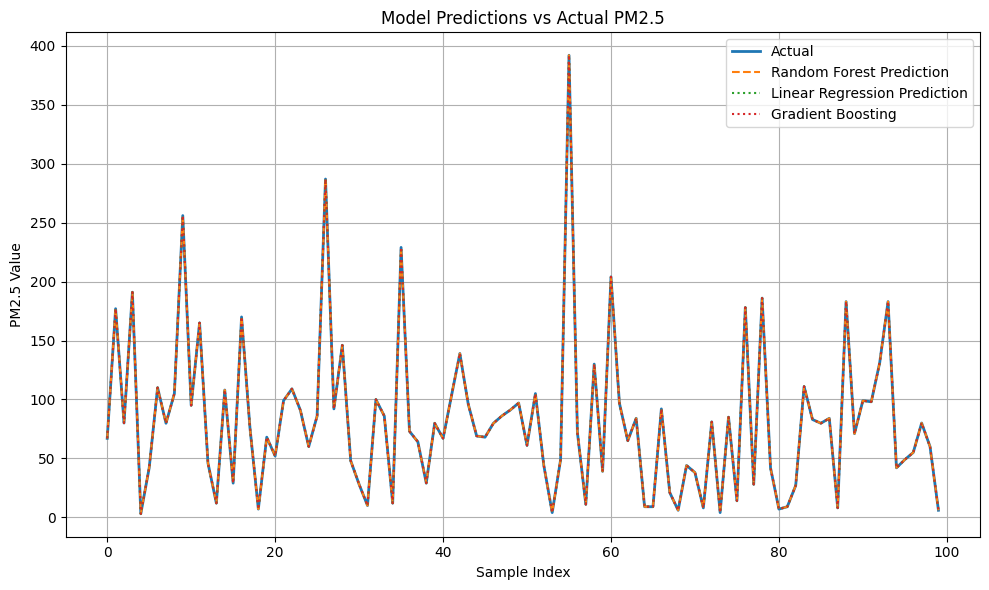

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label='Actual', linewidth=2)
plt.plot(y_pred[:100], label='Random Forest Prediction', linestyle='--')
plt.plot(y_pred_lr[:100], label='Linear Regression Prediction', linestyle=':')
plt.plot(y_pred_lr[:100], label='Gradient Boosting', linestyle=':')

plt.legend()
plt.title("Model Predictions vs Actual PM2.5")
plt.xlabel("Sample Index")
plt.ylabel("PM2.5 Value")
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-44-ae6f38a3fb76>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison, x='Model', y='RMSE', palette='pastel')


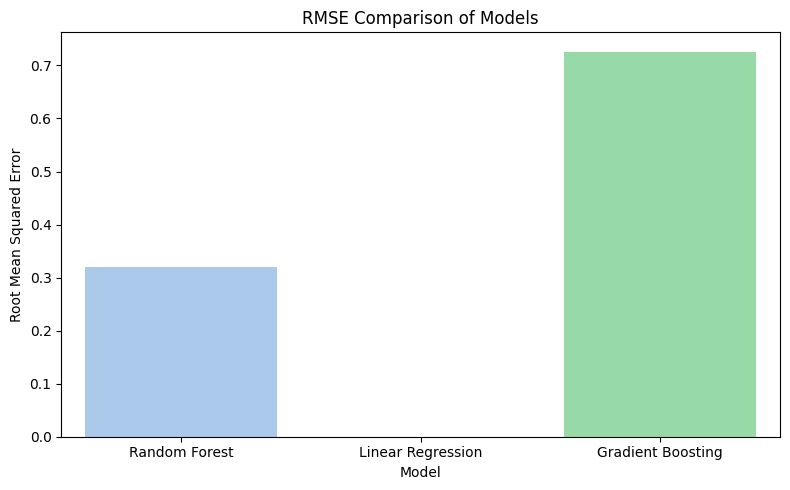

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=comparison, x='Model', y='RMSE', palette='pastel')
plt.title("RMSE Comparison of Models")
plt.ylabel("Root Mean Squared Error")
plt.tight_layout()
plt.show()


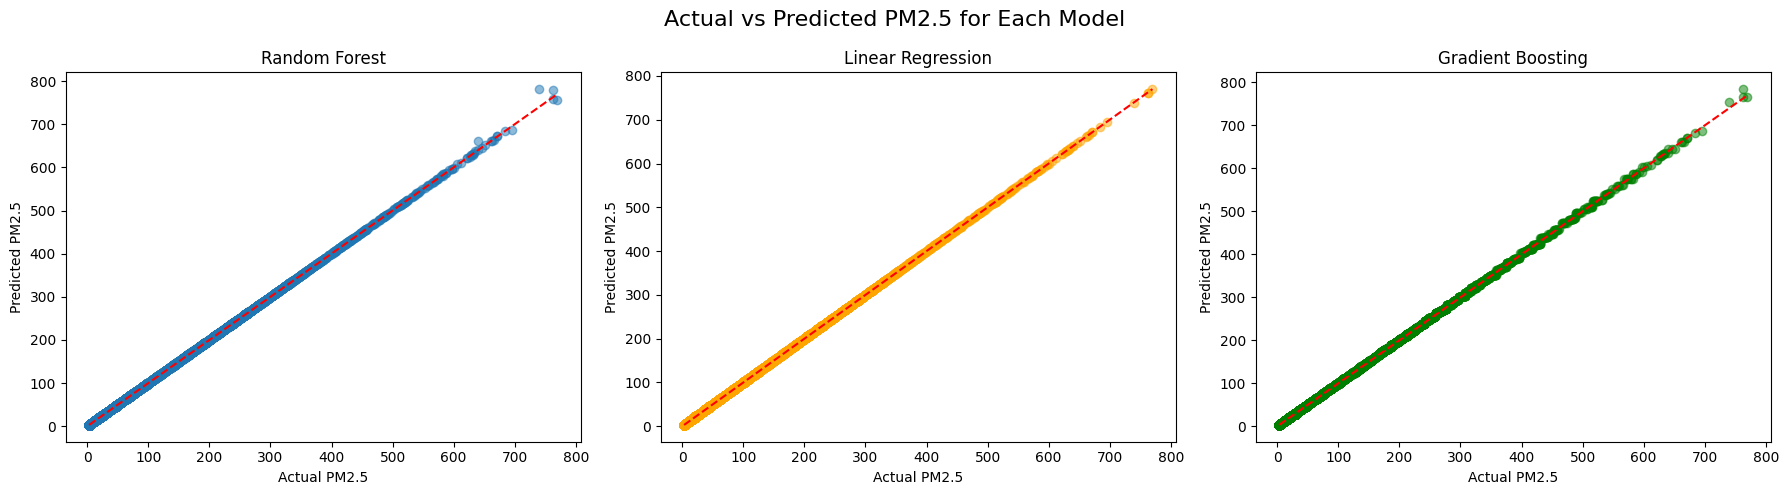

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(y_test, y_pred, alpha=0.5)
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axs[0].set_title("Random Forest")
axs[0].set_xlabel("Actual PM2.5")
axs[0].set_ylabel("Predicted PM2.5")

axs[1].scatter(y_test, y_pred_lr, alpha=0.5, color='orange')
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axs[1].set_title("Linear Regression")
axs[1].set_xlabel("Actual PM2.5")
axs[1].set_ylabel("Predicted PM2.5")

axs[2].scatter(y_test, y_pred_gb, alpha=0.5, color='green')
axs[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axs[2].set_title("Gradient Boosting")
axs[2].set_xlabel("Actual PM2.5")
axs[2].set_ylabel("Predicted PM2.5")

plt.suptitle("Actual vs Predicted PM2.5 for Each Model", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 107.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.6 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.DataFrame()

# ---------- Data Overview ----------
def show_data_info():
    shape = f"Rows: {df.shape[0]}, Columns: {df.shape[1]}"
    head = df.head()

    missing = df.isnull().sum().reset_index()
    missing.columns = ['Column', 'Missing Values']

    dtypes = df.dtypes.reset_index()
    dtypes.columns = ['Column', 'Data Type']

    unique_vals = df.nunique().reset_index()
    unique_vals.columns = ['Column', 'Unique Values']

    describe = df.describe().transpose().reset_index()
    describe.rename(columns={'index': 'Feature'}, inplace=True)

    if 'PM2.5' in df.columns and np.issubdtype(df['PM2.5'].dtype, np.number):
        corr = df.corr(numeric_only=True)['PM2.5'].sort_values(ascending=False).reset_index()
        corr.columns = ['Feature', 'Correlation with PM2.5']
    else:
        corr = pd.DataFrame(columns=['Feature', 'Correlation with PM2.5'])

    return shape, head, missing, dtypes, unique_vals, describe, corr

# ---------- EDA Plot (for both numeric and categorical) ----------
def plot_eda(feature):
    fig, ax = plt.subplots(figsize=(10, 5))

    if feature in df.select_dtypes(include=[np.number]).columns:
        sns.histplot(df[feature], bins=50, kde=True, ax=ax)
        ax.set_title(f"{feature} Distribution (Numeric)")
    elif feature in df.select_dtypes(include=[object]).columns:
        sns.countplot(x=df[feature], ax=ax)
        ax.set_title(f"{feature} Distribution (Categorical)")
    else:
        ax.text(0.5, 0.5, "Selected feature not numeric or categorical!", ha='center')

    plt.tight_layout()
    return fig

# ---------- Modeling ----------
def run_model(model_type):
    df_model = df.select_dtypes(include=[np.number]).dropna()
    if 'PM2.5' not in df_model.columns:
        return "⚠️ 'PM2.5' target column missing in dataset."

    X = df_model.drop(columns=['PM2.5'])
    y = df_model['PM2.5']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    if model_type == "Random Forest":
        model = RandomForestRegressor(n_estimators=100, random_state=42)
    else:
        model = LinearRegression()

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return f"✅ {model_type} Model trained.\nRMSE: {rmse:.2f}\nR² Score: {r2:.2f}"

# ---------- File Upload ----------
def upload_file(file):
    global df
    df = pd.read_csv(file.name)
    return f"✅ File '{file.name}' loaded successfully!", gr.update(choices=df.columns.tolist())

# ---------- Gradio Interface ----------
with gr.Blocks() as app:
    gr.Markdown("## 📊 CMP7005 Air Quality Multi-page GUI")

    with gr.Tab("📂 Upload Data"):
        file_input = gr.File(label="Upload CSV Dataset")
        upload_status = gr.Textbox(label="Status")
        file_input.change(fn=upload_file, inputs=file_input, outputs=[upload_status])

    with gr.Tab("📈 Data Overview"):
        shape_out = gr.Textbox(label="Dataset Shape")
        head_out = gr.Dataframe(label="Sample Data")
        missing_out = gr.Dataframe(label="Missing Values")
        dtype_out = gr.Dataframe(label="Data Types")
        unique_out = gr.Dataframe(label="Unique Values")
        describe_out = gr.Dataframe(label="Descriptive Stats")
        corr_out = gr.Dataframe(label="Correlation with PM2.5")

        overview_btn = gr.Button("Show Overview")
        overview_btn.click(fn=show_data_info,
                           outputs=[shape_out, head_out, missing_out,
                                    dtype_out, unique_out, describe_out, corr_out])

    with gr.Tab("📊 Exploratory Data Analysis"):
        feature_dropdown = gr.Dropdown(choices=[], label="Select Feature")
        plot_out = gr.Plot()
        eda_btn = gr.Button("Plot Distribution")

        eda_btn.click(fn=plot_eda, inputs=feature_dropdown, outputs=plot_out)
        file_input.change(fn=lambda f: gr.update(choices=pd.read_csv(f.name).columns.tolist()),
                          inputs=file_input, outputs=feature_dropdown)

    with gr.Tab("🧠 Modeling and Prediction"):
        model_choice = gr.Radio(choices=["Random Forest", "Linear Regression","Gradient Boosting"], label="Choose Model")
        model_out = gr.Textbox(label="Model Performance")
        model_btn = gr.Button("Train & Predict")
        model_btn.click(fn=run_model, inputs=model_choice, outputs=model_out)

app.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1716f2627c084ea18e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
